# Modelagem

## Agenda
        Simples Feature Engineering
        1 - Criando modelo 
            Linear Regression
                Visualizando Resultados
            Decision Tree Regressor

In [325]:
import pandas as pd

# Separa dados de treino e teste
from sklearn.model_selection import train_test_split

# Modelo/Algoritmo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# Visualizar Resultados
import matplotlib.pyplot as plt

## Simples Feature Engineering

Finalizando preparação dos dados.

> _Resetar Index. Deletar ['price by m²]. "Criar" novas colunas._

In [159]:
df = pd.read_pickle('5 Apartamentos para modelagem.pkl')
df.reset_index(drop= True, inplace=True)
df.drop(columns="price by m²",inplace=True)
df.head()

,price,district,bedroom,bathroom,size,garage
0,174000,Parnamirim,1,1,34.0,1
1,180000,Rosarinho,1,1,34.0,1
2,190000,Rosarinho,1,1,33.0,1
3,190000,Tamarineira,1,1,34.0,1
4,195000,Boa Viagem,1,1,30.0,1


É preciso transformar os valores de ['district'] em números ([**one-hot encoding**](https://minerandodados.com.br/one-hot-encoding-como-funciona-python/)), já que o algoritmo fará cálculos com os valores.

In [161]:
dummies = pd.get_dummies(df.district)
dummies.head()

,Aflitos,Apipucos,Barra de Jangada,Boa Viagem,Boa Vista,Campo Grande,Candeias,Casa Amarela,Casa Forte,Caxangá,...,Madalena,Parnamirim,Piedade,Pina,Prado,Rosarinho,Santo Amaro,Tamarineira,Torre,Várzea
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Adicionar os bairros codificados ao data_frame do modelo e eliminar ['district'].

In [163]:
data_frame = pd.concat([df,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
data_frame.head()

,price,bedroom,bathroom,size,garage,Aflitos,Apipucos,Barra de Jangada,Boa Viagem,Boa Vista,...,Madalena,Parnamirim,Piedade,Pina,Prado,Rosarinho,Santo Amaro,Tamarineira,Torre,Várzea
0,174000,1,1,34.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,180000,1,1,34.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,190000,1,1,33.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,190000,1,1,34.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,195000,1,1,30.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 2 - Criando modelo
Agora podemos começar a criar um modelo de predição de preço de imóveis. 

> Passo 1: Separar features e labels. E dados de treino e teste.
>
> Passo 2: Machine Learning!

In [164]:
X = data_frame.drop(columns="price")
X.head(3)

,bedroom,bathroom,size,garage,Aflitos,Apipucos,Barra de Jangada,Boa Viagem,Boa Vista,Campo Grande,...,Madalena,Parnamirim,Piedade,Pina,Prado,Rosarinho,Santo Amaro,Tamarineira,Torre,Várzea
0,1,1,34.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,34.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,33.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [165]:
y = data_frame.price
y.head(3)

0    174000
1    180000
2    190000
Name: price, dtype: int64

In [390]:
# Separando dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Criando instância do Modelo
linear_model  = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train,y_train)

# Testando a performance do modelo com dados que ele não viu
linear_model.score(X_test,y_test)

0.8482161188371455

## 2 - Visualizando Resultados

In [312]:
original_values = []
predictions = []

In [315]:
# ps: rodei várias vezes para adicionar mais e diferentes resultados às listas
for testing_model in range(5):
    sampling = X.sample()
    prediction = linear_model.predict(sampling)[0]
    y_value = data_frame.loc[sampling.index[0]].price

    print("\n\nPreço Real -->", int(y_value))
    print("Predição ---->", int(prediction))
    print("\nDiferença --->", int(y_value - prediction))
    print("-"*22)
    
    original_values.append(y_value)
    predictions.append(prediction)



Preço Real --> 439330
Predição ----> 356029

Diferença ---> 83300
----------------------


Preço Real --> 780007
Predição ----> 650328

Diferença ---> 129679
----------------------


Preço Real --> 350000
Predição ----> 350226

Diferença ---> -226
----------------------


Preço Real --> 650000
Predição ----> 905301

Diferença ---> -255301
----------------------


Preço Real --> 380000
Predição ----> 380273

Diferença ---> -273
----------------------


## 10 Observações

**Teste 1**

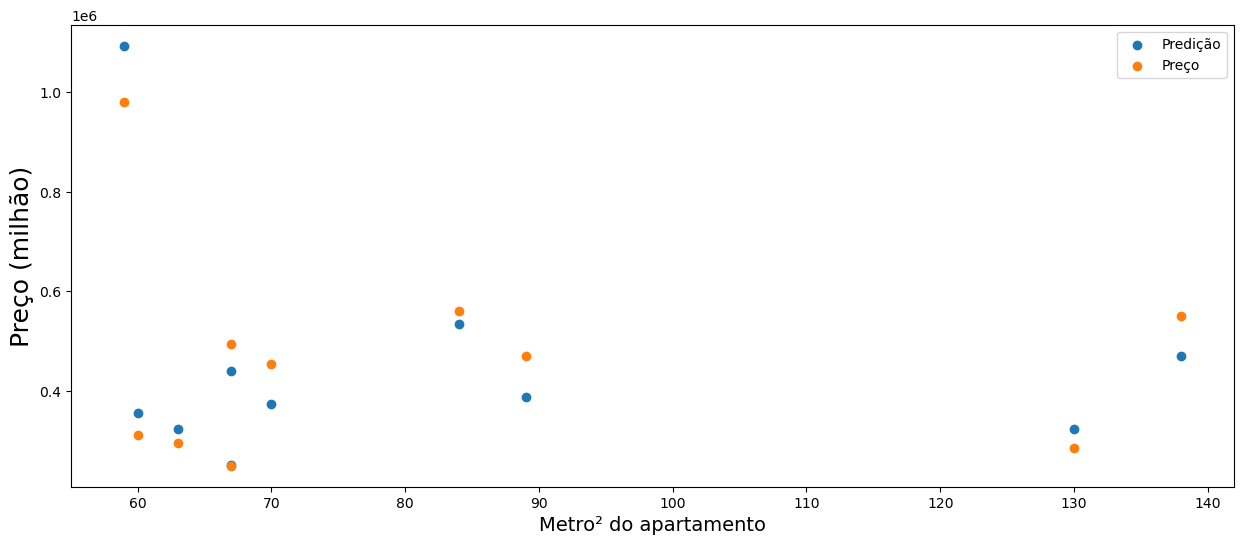

In [288]:
plt.figure(figsize=(15,6))
plt.scatter(X_test['size'].tail(10), predictions, label="Predição")
plt.scatter(X_test['size'].tail(10), original_values, label="Preço")
plt.xlabel('Metro² do apartamento', fontsize=14)
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

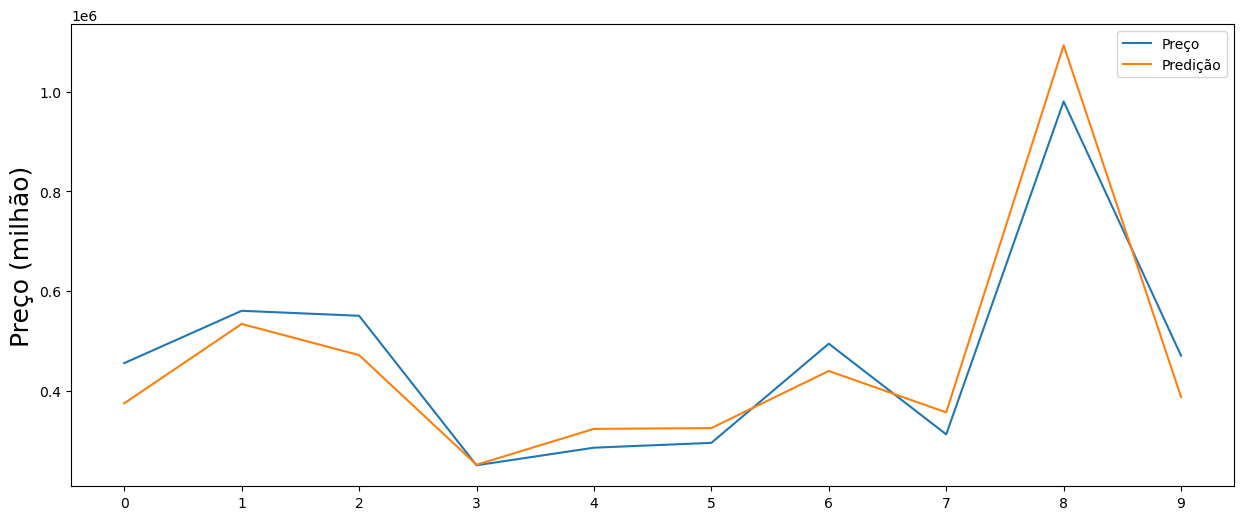

In [289]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

**Teste 2**

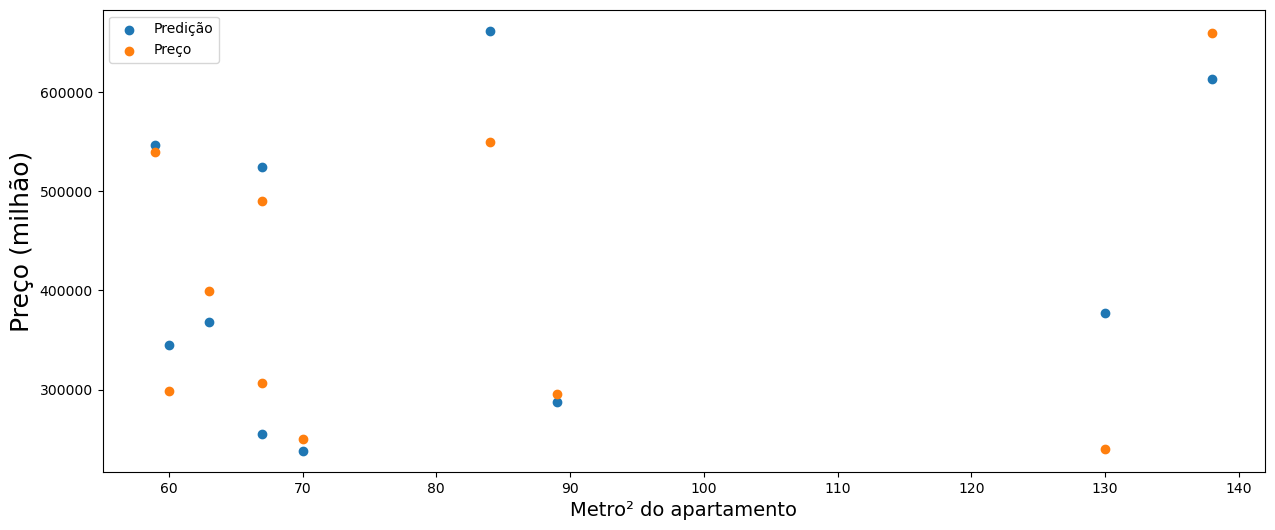

In [310]:
plt.figure(figsize=(15,6))
plt.scatter(X_test['size'].tail(10), predictions, label="Predição")
plt.scatter(X_test['size'].tail(10), original_values, label="Preço")
plt.xlabel('Metro² do apartamento', fontsize=14)
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

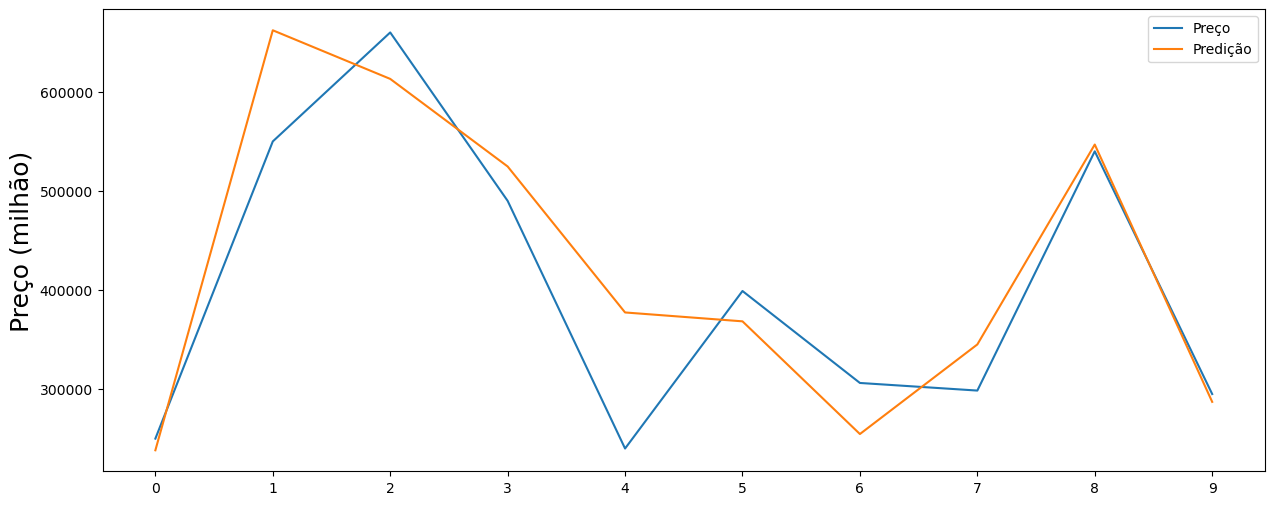

In [311]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

## 15 Observações
**Teste 1**

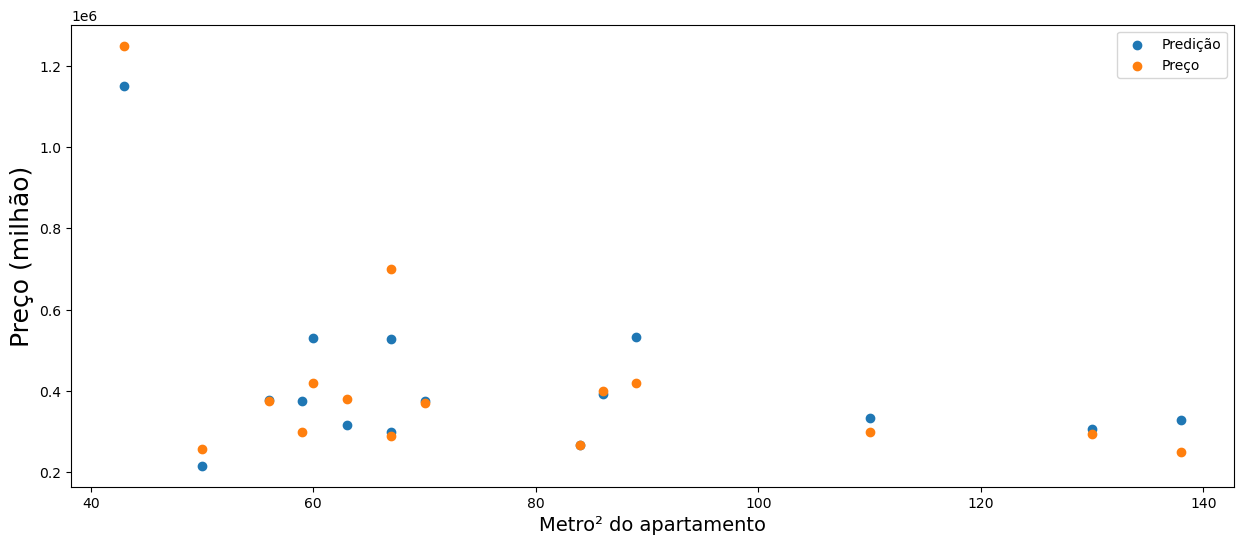

In [294]:
plt.figure(figsize=(15,6))
plt.scatter(X_test['size'].tail(15), predictions, label="Predição")
plt.scatter(X_test['size'].tail(15), original_values, label="Preço")
plt.xlabel('Metro² do apartamento', fontsize=14)
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

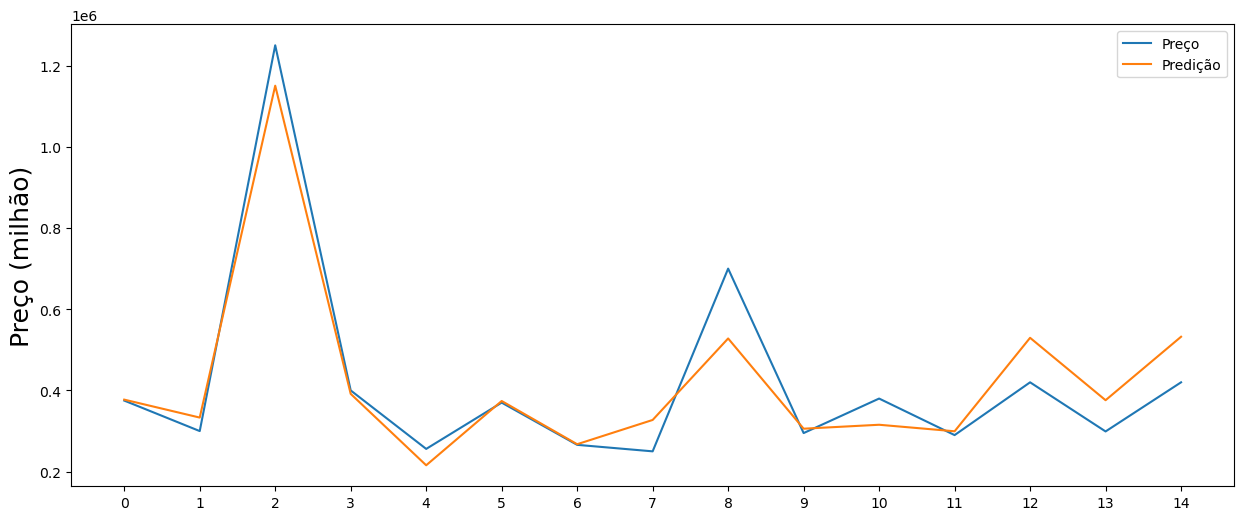

In [295]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

**Teste 2**

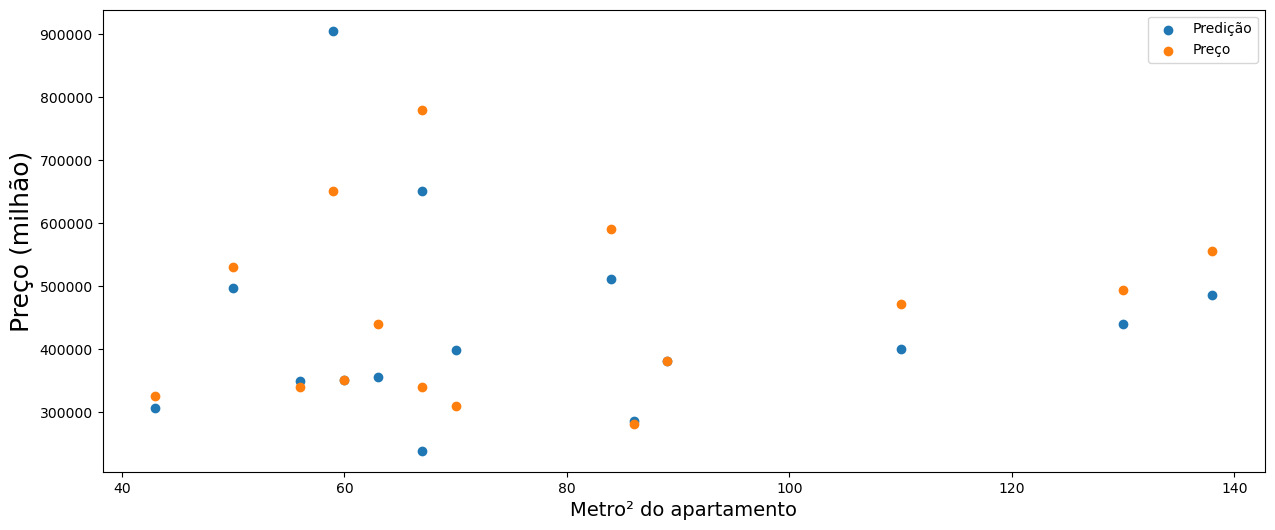

In [316]:
plt.figure(figsize=(15,6))
plt.scatter(X_test['size'].tail(15), predictions, label="Predição")
plt.scatter(X_test['size'].tail(15), original_values, label="Preço")
plt.xlabel('Metro² do apartamento', fontsize=14)
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

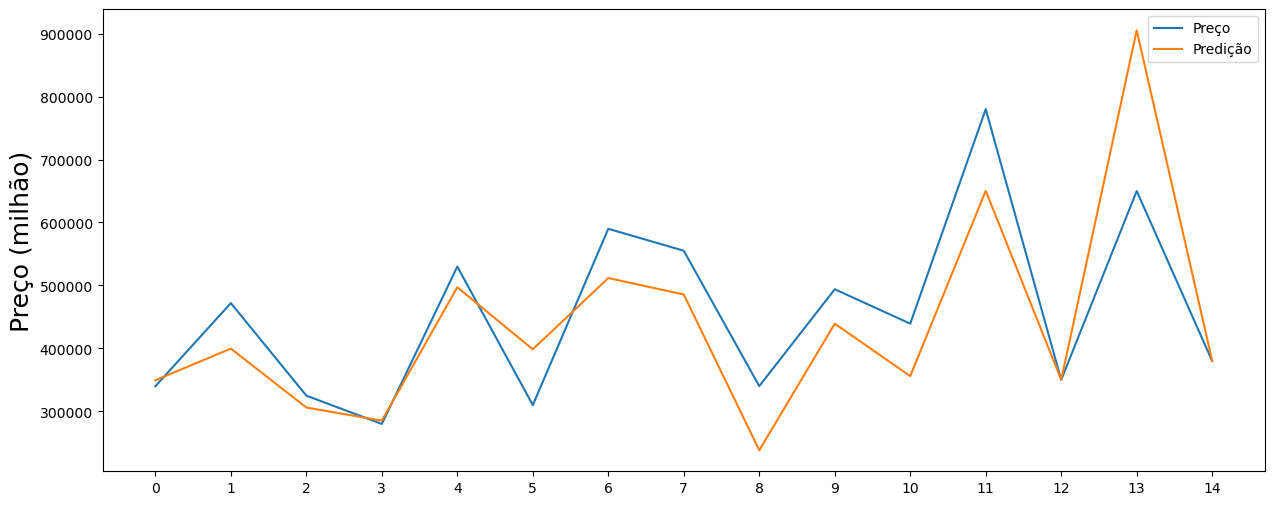

In [317]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.ylabel('Preço (milhão)', fontsize=18)
plt.legend()
plt.show()

## DecisionTreeRegressor()

Score menor.

In [494]:
# Criando instância do Modelo
tree_model  = DecisionTreeRegressor()

# Treinando o modelo
tree_model.fit(X_train,y_train)

# Testando a performance do modelo com dados que ele não viu
tree_model.score(X_test,y_test)

0.7710130661696206

In [483]:
# % de "Importância" das features
for value, feature in zip(tree_model.feature_importances_ ,X.columns):
    print(f"{round(value,2)} ----- {feature}")

0.01 ----- bedroom
0.02 ----- bathroom
0.89 ----- size
0.01 ----- garage
0.0 ----- Aflitos
0.0 ----- Apipucos
0.0 ----- Barra de Jangada
0.01 ----- Boa Viagem
0.0 ----- Boa Vista
0.0 ----- Campo Grande
0.0 ----- Candeias
0.0 ----- Casa Amarela
0.0 ----- Casa Forte
0.0 ----- Caxangá
0.0 ----- Centro
0.0 ----- Cordeiro
0.0 ----- Encruzilhada
0.0 ----- Espinheiro
0.0 ----- Graças
0.0 ----- Ilha do Retiro
0.0 ----- Imbiribeira
0.0 ----- Iputinga
0.0 ----- Madalena
0.0 ----- Parnamirim
0.0 ----- Piedade
0.0 ----- Pina
0.0 ----- Prado
0.0 ----- Rosarinho
0.0 ----- Santo Amaro
0.0 ----- Tamarineira
0.0 ----- Torre
0.0 ----- Várzea
